In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [202]:
data = pd.read_csv("weatherHistory.csv")
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Year'] = data['Formatted Date'].dt.year
data['Day_Year'] = data['Formatted Date'].dt.dayofyear
data = data.groupby(['Day_Year', 'Year'])['Temperature (C)'].mean().reset_index()
data

,Day_Year,Year,Temperature (C)
0,1,2006,4.075000
1,1,2007,3.806713
2,1,2008,-5.663194
3,1,2009,-4.850926
4,1,2010,7.807407
5,1,2011,-5.585648
6,1,2012,0.319907
7,1,2013,-3.375463
8,1,2014,2.934954
9,1,2015,-6.860185


In [203]:
class Perceptron:
    def __init__(self):
        self.lr = 0.0000001
        self.epochs = 1

        self.w = np.random.rand(1, 1)
        self.b = np.random.rand(1, 1)
        
        self.W = []
        self.B = []
        self.loss = []
    def fit(self, x_train, y_train):
        for epoch in range(self.epochs):
            for i in range(len(x_train)):    
                y_pred = np.matmul(x_train[i], self.w) + self.b
                e = y_train[i] - y_pred
                self.w = self.w + e * self.lr * x_train[i]
                self.b = self.b + e * self.lr
                
                Y_pred = np.matmul(x_train, self.w)
                error = np.mean(np.abs(y_train - Y_pred))
                
                self.loss.append(error)
                self.W.append(self.w)
                self.B.append(self.b)
                
        np.save('dataset.npy', self.W + self.B)

    def predict(self, x):
        y_pred = np.matmul(x, self.w) + self.b
        return y_pred

    def evaluate(self, X, Y):
        y_pred = np.matmul(X, self.w) + self.b
        MSE = mean_squared_error(Y, y_pred)
        return MSE

    def get_loss(self):
        return self.loss

In [204]:
X = data['Day_Year'].values.reshape(-1, 1)
Y = data['Temperature (C)'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=24)
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X)
mse = perceptron.evaluate(X_test, Y_test)
print(f'MSE: {mse}')

MSE: 94.88900647535739


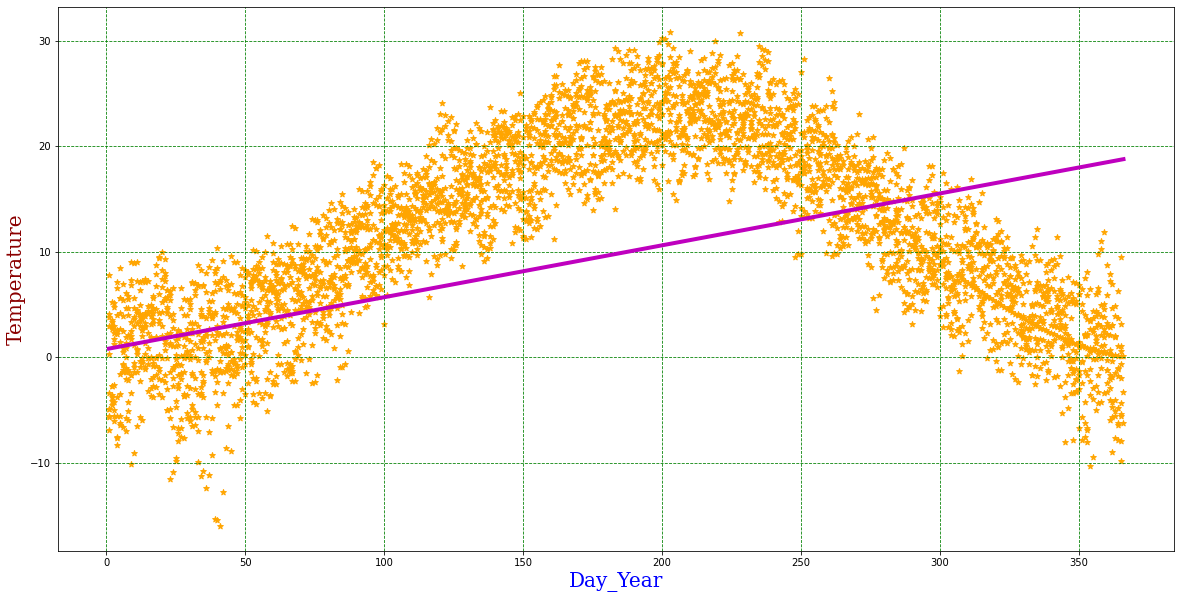

In [205]:
plt.figure(figsize=(20, 10))
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':20}
plt.scatter(X, Y, marker='*', c='orange')
plt.plot(X, Y_pred, color='m', lw=4, label='Fitted line')
plt.xlabel('Day_Year', fontdict = font1)
plt.ylabel('Temperature', fontdict = font2)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.8)
plt.show()

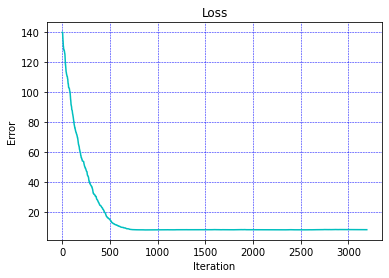

In [206]:
loss = perceptron.get_loss()
plt.plot(loss[20:], c="c")
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Loss')
plt.grid(linestyle = '--', linewidth = 0.5, color="b")
plt.show()

In [208]:
open_data = np.load('dataset.npy')
open_data

array([[[0.92539573]],

       [[0.92146157]],

       [[0.91709067]],

       ...,

       [[0.79077067]],

       [[0.7907716 ]],

       [[0.79077115]]])